 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [34]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

In [35]:
import os
print(os.getcwd())


c:\Users\erino\Homework_Repos\Module_4_Pandas


# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [36]:
# Reading whale returns

whale_returns_csv_path = "C:\\Users\\erino\\UCB-VIRT-FIN-PT-09-2023-U-LOLC\\04-Pandas\\Starter_Code\\Resources\\whale_returns.csv"
whale_returns_df = pd.read_csv(whale_returns_csv_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_returns_df = whale_returns_df.sort_index()
whale_returns_df.head()




C:\Users\erino\AppData\Local\Temp\ipykernel_10744\1829012167.py:4: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  whale_returns_df = pd.read_csv(whale_returns_csv_path, index_col="Date", infer_datetime_format=True, parse_dates=True)


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [37]:
# Drop nulls
whale_returns_df.dropna(inplace=True)

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [38]:
# Reading algorithmic returns

algo_returns_csv_path = 'C:\\Users\\erino\\UCB-VIRT-FIN-PT-09-2023-U-LOLC\\04-Pandas\\Starter_Code\\Resources\\algo_returns.csv'
algo_returns_df = pd.read_csv(algo_returns_csv_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_returns_df = algo_returns_df.sort_index()
algo_returns_df.head()





C:\Users\erino\AppData\Local\Temp\ipykernel_10744\1262316506.py:4: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  algo_returns_df = pd.read_csv(algo_returns_csv_path, index_col="Date", infer_datetime_format=True, parse_dates=True)


,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [39]:
# Count nulls
print(algo_returns_df.isnull().sum())


Algo 1    0
Algo 2    6
dtype: int64


In [40]:
# Drop nulls
algo_returns_df.dropna(inplace=True)
# algo_returns_df.fillna(method='ffill', inplace=True)
# print(algo_returns_df.duplicated().sum())
# algo_returns_df.drop_duplicates(inplace=True)
# print(algo_returns_df.dtypes)

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [41]:
# Reading S&P 500 Closing Prices
sp500_csv_path = "C:\\Users\\erino\\UCB-VIRT-FIN-PT-09-2023-U-LOLC\\04-Pandas\\Starter_Code\\Resources\\sp500_history.csv"
sp500_returns_df = pd.read_csv(sp500_csv_path, index_col="Date", infer_datetime_format=True, parse_dates=True)

sp500_returns_df = sp500_returns_df.sort_index()

print(sp500_returns_df.head())

               Close
Date                
2012-10-01  $1444.49
2012-10-02  $1445.75
2012-10-03  $1450.99
2012-10-04  $1461.40
2012-10-05  $1460.93


C:\Users\erino\AppData\Local\Temp\ipykernel_10744\2820895578.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  sp500_returns_df = pd.read_csv(sp500_csv_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
C:\Users\erino\AppData\Local\Temp\ipykernel_10744\2820895578.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sp500_returns_df = pd.read_csv(sp500_csv_path, index_col="Date", infer_datetime_format=True, parse_dates=True)


In [42]:
# Check Data Types
sp500_returns_df.dtypes


Close    object
dtype: object

In [43]:
# Fix Data Types
#sp500_returns_df['Date'] = pd.to_datetime(sp500_returns_df['Date'])  # Convert 'Date' column to datetime

# new_data_types = df.dtypes
# print("\nUpdated Data Types:")
# print(new_data_types)
sp500_returns_df["Close"] = sp500_returns_df["Close"].str.replace("$","").astype("float")
sp500_returns_df


,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93
...,...
2019-04-16,2907.06
2019-04-17,2900.45
2019-04-18,2905.03


In [44]:
# Calculate Daily Returns

# sp500_returns_df.sort_values(by='Date', ascending=True, inplace=True)
# sp500_returns_df.dropna(subset=['Close'], inplace=True)

# sp500_returns_df['Daily_Return'] = sp500_returns_df['Close'].pct_change()


# # Print the DataFrame with the added 'Daily_Return' column
# print(sp500_returns_df)

# Convert 'Date' column to datetime format (if not already)
#sp500_returns_df['Date'] = pd.to_datetime(sp500_returns_df['Date'])

# Sort DataFrame by date
#sp500_returns_df.sort_values(by='Date', ascending=True, inplace=True)

# Check for NaN values and drop rows with missing 'Close' values
#sp500_returns_df.dropna(subset=['Close'], inplace=True)

# Calculate daily returns
sp500_returns_df['Daily_Return'] = sp500_returns_df['Close'].pct_change()

# Print the DataFrame with the added 'Daily_Return' column
print(sp500_returns_df)

              Close  Daily_Return
Date                             
2012-10-01  1444.49           NaN
2012-10-02  1445.75      0.000872
2012-10-03  1450.99      0.003624
2012-10-04  1461.40      0.007174
2012-10-05  1460.93     -0.000322
...             ...           ...
2019-04-16  2907.06      0.000509
2019-04-17  2900.45     -0.002274
2019-04-18  2905.03      0.001579
2019-04-22  2907.97      0.001012
2019-04-23  2933.68      0.008841

[1649 rows x 2 columns]


In [45]:
# Drop nulls

sp500_returns_df.dropna(inplace=True)

# Print the DataFrame after dropping NaN values
sp500_returns_df

,Close,Daily_Return
Date,,
2012-10-02,1445.75,0.000872
2012-10-03,1450.99,0.003624
2012-10-04,1461.40,0.007174
2012-10-05,1460.93,-0.000322
2012-10-08,1455.88,-0.003457
...,...,...
2019-04-16,2907.06,0.000509
2019-04-17,2900.45,-0.002274
2019-04-18,2905.03,0.001579


In [46]:
# Rename `Close` Column to be specific to this portfolio.

sp500_returns_df.rename(columns={'Close': 'SP500'}, inplace=True)

# Print the DataFrame with the renamed column
sp500_returns_df

,SP500,Daily_Return
Date,,
2012-10-02,1445.75,0.000872
2012-10-03,1450.99,0.003624
2012-10-04,1461.40,0.007174
2012-10-05,1460.93,-0.000322
2012-10-08,1455.88,-0.003457
...,...,...
2019-04-16,2907.06,0.000509
2019-04-17,2900.45,-0.002274
2019-04-18,2905.03,0.001579


## Combine Whale, Algorithmic, and S&P 500 Returns

In [47]:
portfolios_df = pd.concat([whale_returns_df, algo_returns_df, sp500_returns_df["Daily_Return"]], axis="columns", join="inner")
portfolios_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Daily_Return
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

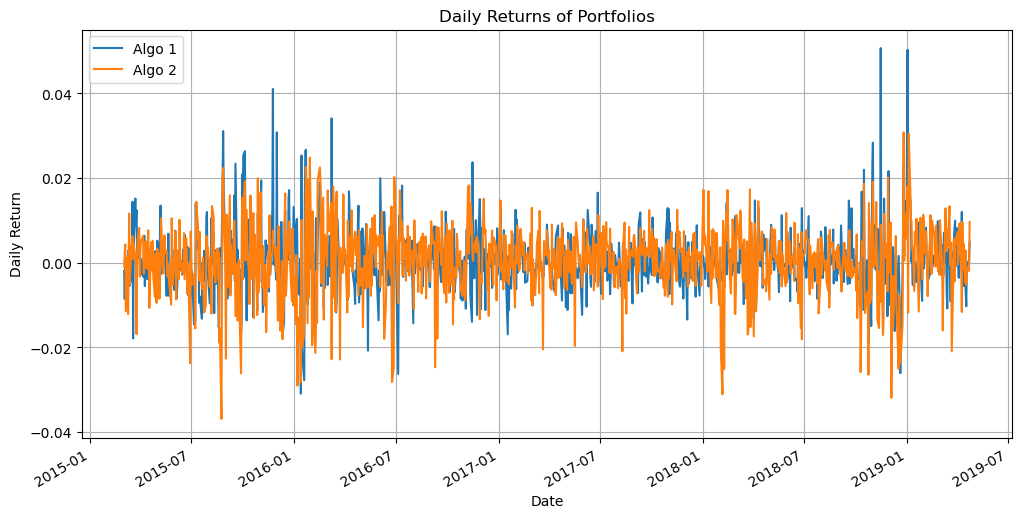

In [48]:
# Plot daily returns of all portfolios
import matplotlib.pyplot as plt

# Set the 'Date' column as the index
#portfolios_df.set_index('Date', inplace=True)  

# # Specify the columns for daily returns from each DataFrame
columns_to_plot = ['Algo 1', 'Algo 2']

# # Plot daily returns of all portfolios
portfolios_df[columns_to_plot].plot(figsize=(12, 6))
plt.title("Daily Returns of Portfolios")
plt.xlabel("Date")
plt.ylabel("Daily Return")
plt.grid(True)
plt.legend(loc='upper left')
plt.show()

#### Calculate and Plot cumulative returns.

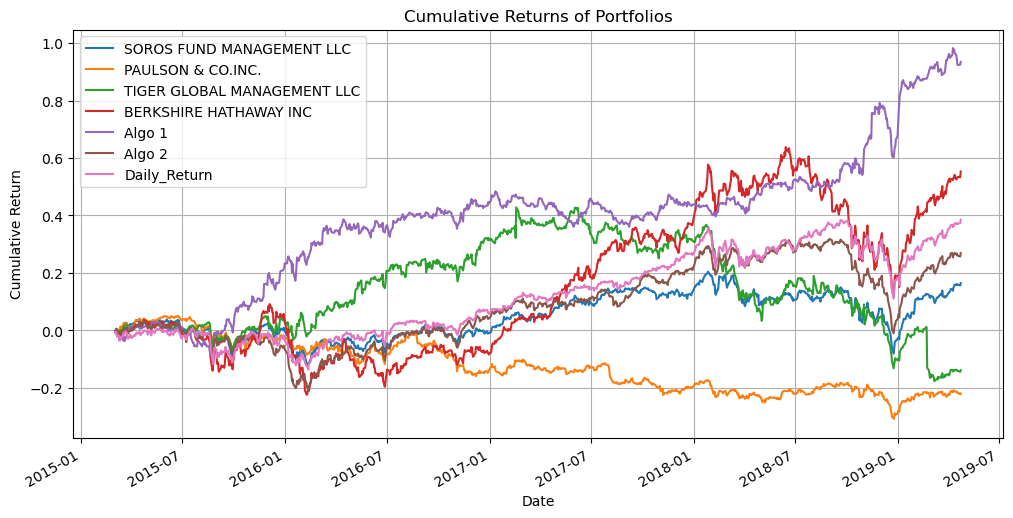

In [49]:
# Calculate cumulative returns of all portfolios

import pandas as pd
import matplotlib.pyplot as plt


# You can calculate cumulative returns for each column
cumulative_returns = (1 + portfolios_df).cumprod() -1

# Plot cumulative returns
cumulative_returns.plot(figsize=(12, 6))
plt.title("Cumulative Returns of Portfolios")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.grid(True)
plt.legend(loc='upper left')
plt.show()


---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


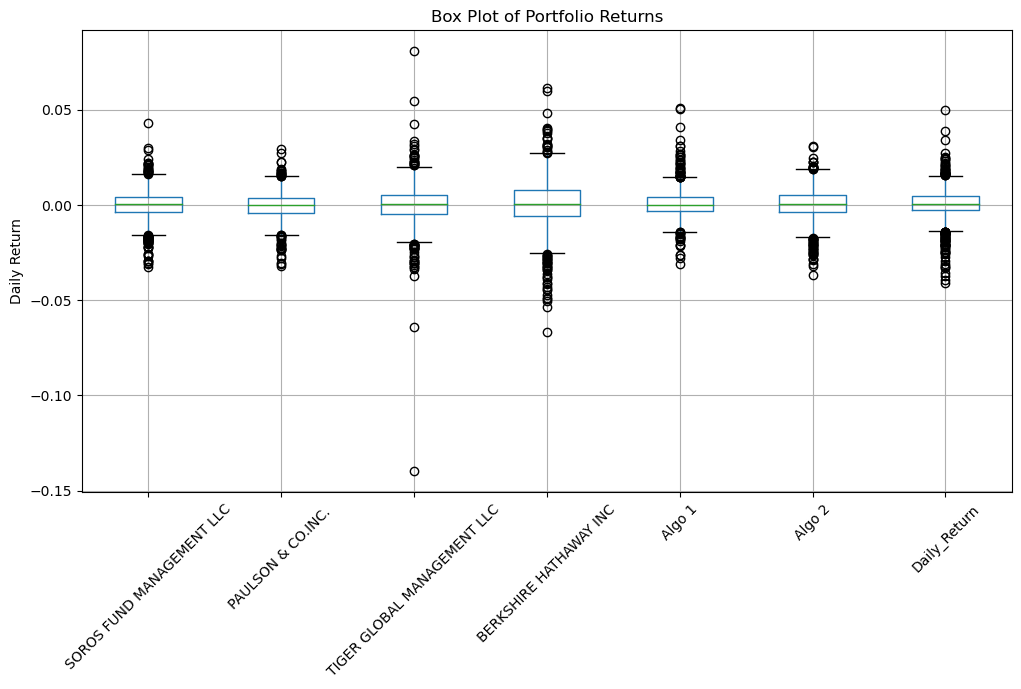

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'combined_df' with daily returns
# You can create a box plot to visualize risk
portfolios_df.boxplot(figsize=(12, 6), rot=45)
plt.title("Box Plot of Portfolio Returns")
plt.ylabel("Daily Return")
plt.grid(True)
plt.show()


### Calculate Standard Deviations

In [51]:

# Calculate the daily standard deviations of all portfolios
daily_std_dev = portfolios_df.std()

# Display the daily standard deviations
print(daily_std_dev)

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
Daily_Return                   0.008554
dtype: float64


### Determine which portfolios are riskier than the S&P 500

In [52]:
daily_std_dev["Daily_Return"]

0.008553731597758204

In [53]:
# # # Calculate the daily standard deviation of S&P 500
sp500_std_dev = daily_std_dev["Daily_Return"]
#sp500_std_dev

sp500_filter = daily_std_dev > sp500_std_dev
daily_std_dev[sp500_filter]

# # # # Determine which portfolios are riskier than S&P 500
#riskier_portfolios = portfolios_df[portfolios_df > sp500_std_dev].index
# # riskier_portfolios = daily_std_dev.columns[daily_std_dev.std() > sp500_std_dev]

# # # # Display the riskier portfolios
# print("Portfolios riskier than S&P 500:")
# print(riskier_portfolios)

# # Calculate the daily returns of 'S&P 500'
# portfolios_df['SP500 Daily Return'] = portfolios_df['SP500 Close'].pct_change()

# # Add the 'S&P 500' daily returns column to daily_std_dev DataFrame
# daily_std_dev['S&P 500'] = portfolios_df['SP500 Daily Return']


TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

### Calculate the Annualized Standard Deviation

In [54]:
# Calculate the annualized standard deviation (252 trading days)
import numpy as np

# Calculate the daily standard deviation of the portfolio
daily_std_dev = portfolios_df.std()

# Calculate the annualized standard deviation (252 trading days)
annualized_std_dev = daily_std_dev * np.sqrt(252)

# Display the annualized standard deviation
print("Annualized Standard Deviation:")
print(annualized_std_dev)


Annualized Standard Deviation:
SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
Daily_Return                   0.135786
dtype: float64


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<Axes: xlabel='Date'>

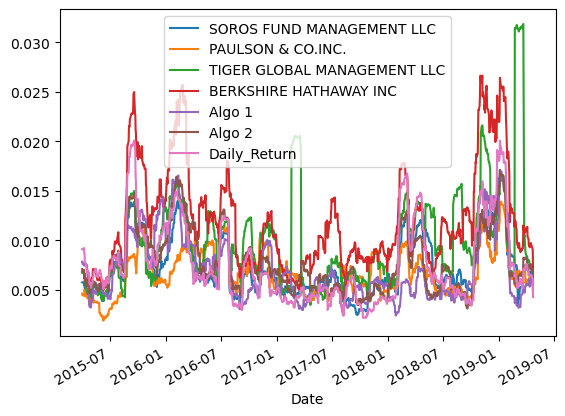

In [55]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
import pandas as pd
import matplotlib.pyplot as plt

# # Calculate the rolling standard deviation with a 21-day window
rolling_std_dev = portfolios_df.rolling(window=21).std()
rolling_std_dev.plot()
# Plot the rolling standard deviation
#plt.figure(rolling_std_dev, figsize=(12, 6))
#for column in rolling_std_dev.columns:
#plt.plot(rolling_std_dev.index, rolling_std_dev[column], label=column)

# Plot the rolling standard deviation

# plt.title("Rolling 21-Day Standard Deviation of Portfolios")
# plt.xlabel("Date")
# plt.ylabel("Standard Deviation")
# plt.grid(True)
# plt.legend(loc='upper left')
# plt.show()




# Plot the rolling standard deviation


### Calculate and plot the correlation

Correlation Matrix:


<Axes: >

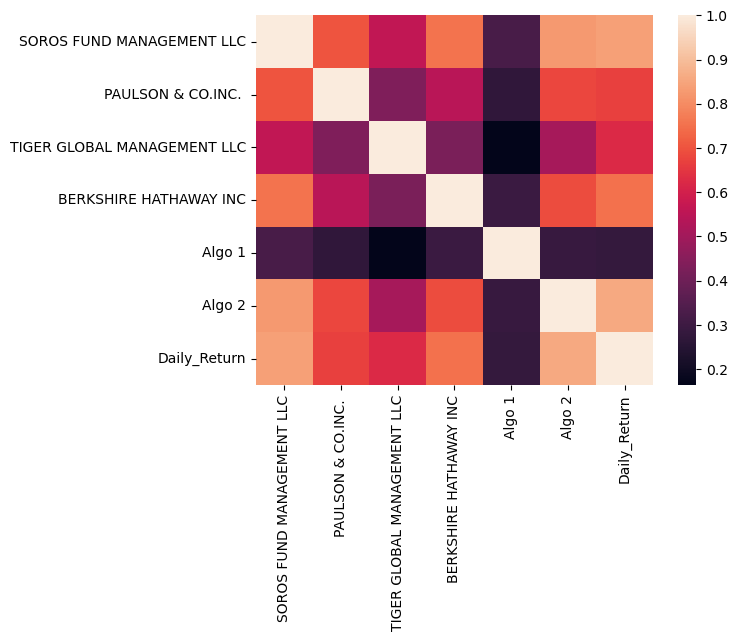

In [56]:
# Calculate the correlation
import seaborn as sns
correlation_matrix = portfolios_df.corr()

# Display the correlation matrix
print("Correlation Matrix:")
sns.heatmap(correlation_matrix)




### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [57]:
portfolios_df["Algo 1"].cov( portfolios_df['Daily_Return'])


1.821774999163274e-05

In [58]:
sp500_returns_df.var()

SP500           161494.210133
Daily_Return         0.000066
dtype: float64

In [59]:
portfolios_df["Algo 1"].cov( portfolios_df['Daily_Return']) / sp500_returns_df.var()

SP500           1.128074e-10
Daily_Return    2.768962e-01
dtype: float64

In [60]:
# Calculate covariance of a single portfolio

# Calculate variance of S&P 500

# Computing beta

# Plot beta trend

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'combined_df' with daily returns of portfolios and S&P 500
# Replace 'Your Portfolio Column Name' with the actual column name for your portfolio in combined_df

# Calculate the covariance between the portfolio returns and the S&P 500 returns
portfolio_returns = portfolios_df['Algo 1']
sp500_returns = portfolios_df['Daily_Return']
covariance = np.cov(portfolio_returns, sp500_returns)[0, 1]

# Calculate the variance of S&P 500 returns
sp500_variance = np.var(sp500_returns)

# Compute the portfolio's beta
portfolio_beta = covariance / sp500_variance

# Display the portfolio's beta
print(f"Portfolio Beta: {portfolio_beta}")

# Plot beta trend (assuming you have a DataFrame with dates and beta values)
# Replace 'dates' and 'beta_values' with your actual data
# plt.figure(figsize=(12, 6))
# plt.plot(dates, beta_values, label='Portfolio Beta', color='blue')
# plt.title("Portfolio Beta Trend")
# plt.xlabel("Date")
# plt.ylabel("Beta")
# plt.legend(loc='upper left')
# plt.grid(True)
# plt.show()


Portfolio Beta: 0.24922986940672684


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

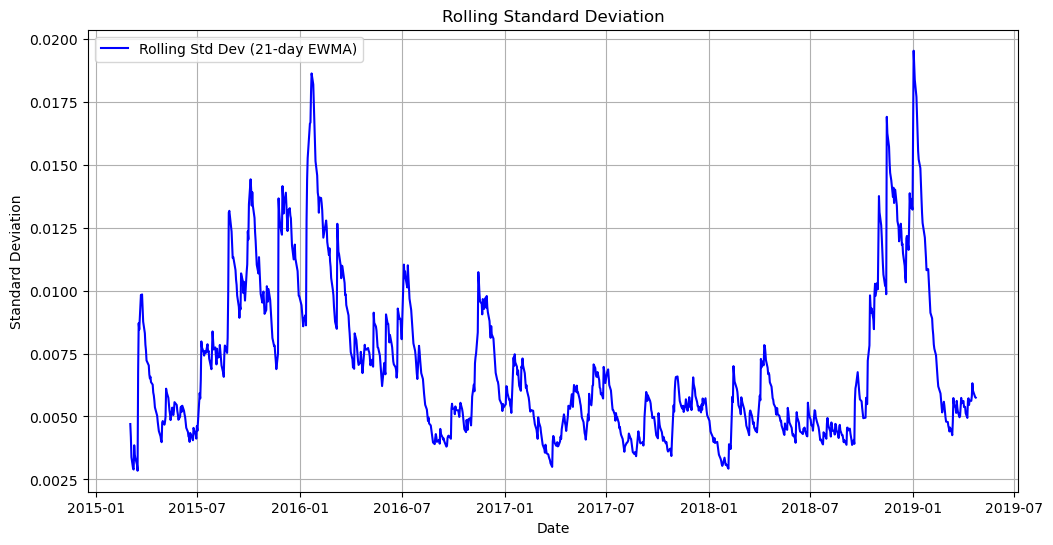

In [61]:
# Use `ewm` to calculate the rolling window

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'combined_df' with daily returns
# Replace 'Your Portfolio Column Name' with the actual column name for your portfolio in combined_df

# Calculate the rolling window using EWMA
portfolio_returns = portfolios_df['Algo 1']
rolling_window = portfolio_returns.ewm(span=21).std()

# Plot the rolling standard deviation
plt.figure(figsize=(12, 6))
plt.plot(portfolio_returns.index, rolling_window, label='Rolling Std Dev (21-day EWMA)', color='blue')
plt.title("Rolling Standard Deviation")
plt.xlabel("Date")
plt.ylabel("Standard Deviation")
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [62]:

import pandas as pd
import matplotlib.pyplot as plt

# Example data (replace with actual data)
portfolio_returns = portfolios_df['Algo 1']
risk_free_rate = 0.02  # Replace with your risk-free rate (e.g., 10-year Treasury yield)

# Calculate the average daily return
average_daily_return = portfolio_returns.mean()

# Calculate the annualized standard deviation (volatility)
annualized_volatility = portfolio_returns.std() * (252 ** 0.5)  # Assuming 252 trading days

# Calculate the annualized Sharpe ratio
sharpe_ratio = (average_daily_return - risk_free_rate) / annualized_volatility

print(f"Average Daily Return: {average_daily_return:.6f}")
print(f"Annualized Volatility (Standard Deviation): {annualized_volatility:.6f}")
print(f"Sharpe Ratio (Annualized): {sharpe_ratio:.6f}")


Average Daily Return: 0.000662
Annualized Volatility (Standard Deviation): 0.120967
Sharpe Ratio (Annualized): -0.159864


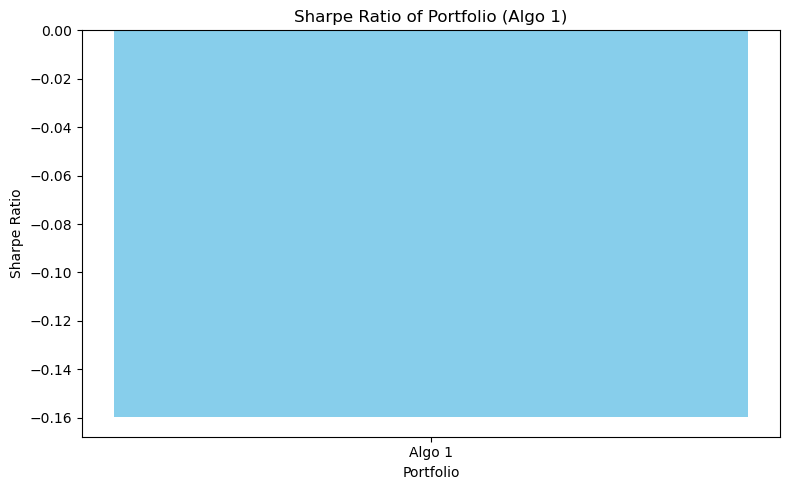

In [63]:

import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have calculated the annualized Sharpe ratio
# Example data:
sharpe_ratio = -0.159864  # Replace with your actual Sharpe ratio

# Create a DataFrame to store the Sharpe ratio
sharpe_df = pd.DataFrame({'Portfolio': ['Algo 1'], 'Sharpe Ratio': [sharpe_ratio]})

# Plot the Sharpe ratio as a bar plot
plt.figure(figsize=(8, 5))
plt.bar(sharpe_df['Portfolio'], sharpe_df['Sharpe Ratio'], color='skyblue')
plt.title('Sharpe Ratio of Portfolio (Algo 1)')
plt.xlabel('Portfolio')
plt.ylabel('Sharpe Ratio')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.tight_layout()
plt.show()

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

In [195]:
Yes

NameError: name 'Yes' is not defined

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [90]:
import yfinance as yf
import pandas as pd

# Define the stock symbols or tickers you want to fetch
custom_symbols = ["AAPL", "GOOGL", "MSFT", "AMZN", "TSLA"]

# Define the start and end dates for your data
start_date = "2021-01-01"
end_date = "2022-01-01"

# Create an empty DataFrame to store the data
custom_portfolio_df = pd.DataFrame()

# Loop through each stock symbol and fetch data
for symbol in custom_symbols:
    stock_data = yf.download(symbol, start=start_date, end=end_date)['Close']
    custom_portfolio_df[symbol] = stock_data

# Display the DataFrame with closing prices for each stock
print(custom_portfolio_df.head())



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
                  AAPL      GOOGL        MSFT        AMZN        TSLA
Date                                                                 
2021-01-04  129.410004  86.306503  217.690002  159.331497  243.256668
2021-01-05  131.009995  87.002502  217.899994  160.925507  245.036667
2021-01-06  126.599998  86.143997  212.250000  156.919006  251.993332
2021-01-07  130.919998  88.717003  218.289993  158.108002  272.013336
2021-01-08  132.050003  89.891502  219.619995  159.134995  293.339996


In [91]:
# Reading data from 2nd stock
symbol = "GOOGL"

# Define the start and end dates for your data
start_date = "2021-01-01"
end_date = "2022-01-01"

# Fetch the data for the specified stock and date range
googl_data = yf.download(symbol, start=start_date, end=end_date)

# Display the fetched data
print(googl_data.head())

[*********************100%%**********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2021-01-04  88.000000  88.124496  85.357002  86.306503  86.306503  37324000
2021-01-05  86.254501  87.341499  85.845001  87.002502  87.002502  20360000
2021-01-06  85.013000  87.198502  84.805000  86.143997  86.143997  46588000
2021-01-07  86.337997  88.890999  86.337997  88.717003  88.717003  41936000
2021-01-08  88.858002  89.968002  88.060997  89.891502  89.891502  35484000


In [92]:
# Reading data from 3rd stock
symbol = "MSFT"

# Define the start and end dates for your data
start_date = "2021-01-01"
end_date = "2022-01-01"

# Fetch the data for the specified stock and date range
msft_data = yf.download(symbol, start=start_date, end=end_date)

# Display the fetched data
print(msft_data.head())

[*********************100%%**********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2021-01-04  222.529999  223.000000  214.809998  217.690002  212.426895   
2021-01-05  217.259995  218.520004  215.699997  217.899994  212.631821   
2021-01-06  212.169998  216.490005  211.940002  212.250000  207.118423   
2021-01-07  214.039993  219.339996  213.710007  218.289993  213.012344   
2021-01-08  218.679993  220.580002  217.029999  219.619995  214.310226   

              Volume  
Date                  
2021-01-04  37130100  
2021-01-05  23823000  
2021-01-06  35930700  
2021-01-07  27694500  
2021-01-08  22956200  


In [93]:
# Combine all stocks in a single DataFrame



# Define the stock symbols or tickers you want to fetch
custom_symbols = ["AAPL", "GOOGL", "MSFT", "AMZN", "TSLA"]

# Define the start and end dates for your data
start_date = "2021-01-01"
end_date = "2022-01-01"

# Create an empty DataFrame to store the data
custom_portfolio_df = pd.DataFrame()

# Loop through each stock symbol and fetch data
for symbol in custom_symbols:
    custom_portfolio_df = pd.concat([googl_data, msft_data], axis="rows", join="inner")


    # stock_data = yf.download(symbol, start=start_date, end=end_date)['Close']
    # custom_portfolio_data[symbol] = stock_data

# Display the DataFrame with closing prices for each stock
custom_portfolio_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,88.000000,88.124496,85.357002,86.306503,86.306503,37324000
2021-01-05,86.254501,87.341499,85.845001,87.002502,87.002502,20360000
2021-01-06,85.013000,87.198502,84.805000,86.143997,86.143997,46588000
2021-01-07,86.337997,88.890999,86.337997,88.717003,88.717003,41936000
2021-01-08,88.858002,89.968002,88.060997,89.891502,89.891502,35484000


In [94]:
# Reset Date index

custom_portfolio_df.reset_index(inplace=True)
custom_portfolio_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-01-04,88.000000,88.124496,85.357002,86.306503,86.306503,37324000
1,2021-01-05,86.254501,87.341499,85.845001,87.002502,87.002502,20360000
2,2021-01-06,85.013000,87.198502,84.805000,86.143997,86.143997,46588000
3,2021-01-07,86.337997,88.890999,86.337997,88.717003,88.717003,41936000
4,2021-01-08,88.858002,89.968002,88.060997,89.891502,89.891502,35484000


In [99]:
# Reorganize portfolio data by having a column per symbol
pivot_table_df = custom_portfolio_df.pivot_table(index='Date', columns='Open', values='Close')
print()

In [100]:
# Calculate daily returns

custom_portfolio_df['Daily_Return'] = custom_portfolio_df['Close'].pct_change()

# Drop rows with missing values (NAs)
custom_portfolio_returns = custom_portfolio_df.dropna()

# Display sample data
print(custom_portfolio_returns.head())

# Drop NAs

# Display sample data


        Date       Open       High        Low      Close  Adj Close    Volume  \
1 2021-01-05  86.254501  87.341499  85.845001  87.002502  87.002502  20360000   
2 2021-01-06  85.013000  87.198502  84.805000  86.143997  86.143997  46588000   
3 2021-01-07  86.337997  88.890999  86.337997  88.717003  88.717003  41936000   
4 2021-01-08  88.858002  89.968002  88.060997  89.891502  89.891502  35484000   
5 2021-01-11  88.850998  89.219002  87.607002  87.814499  87.814499  34796000   

   Daily_Return  
1      0.008064  
2     -0.009868  
3      0.029869  
4      0.013239  
5     -0.023106  


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [103]:
# Set weights
weights = [1/5, 1/5, 1/5, 1/5, 1/5]

# Calculate portfolio return

# Display sample data

# custom_portfolio_df = custom_portfolio_df.dropna().copy()

# Calculate daily returns for each stock in the custom portfolio
# custom_portfolio_df = custom_portfolio_df.pct_change()

# Assume equal weights for each stock
# weights = [1 / len(custom_symbols)] * len(custom_symbols)

# Calculate the portfolio returns (weighted sum of individual stock returns)
custom_portfolio_df = custom_portfolio_df.dot(weights)

# Display the custom portfolio returns
print(custom_portfolio_df.head())



ValueError: Dot product shape mismatch, (503, 8) vs (5,)

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [104]:
# Join your returns DataFrame to the original returns DataFrame
portfolios_df['Custom Portfolio'] = custom_portfolio_df

# Display the updated DataFrame
print(portfolios_df.head())

ValueError: Cannot set a DataFrame with multiple columns to the single column Custom Portfolio

In [105]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
portfolios_df.dropna(inplace=True)
print(portfolios_df.head)

<bound method NDFrame.head of             SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   
...                               ...                 ...   
2019-04-16                   0.002699            0.000388   
2019-04-17                  -0.002897           -0.006467   
2019-04-18                   0.001448            0.001222   
2019-04-22                  -0.002586           -0.007333   
2019-04-23                   0.007167            0.003485   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-03            

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [106]:
# Calculate the annualized `std`
annualized_std_dev = portfolios_df.std()
print(f"Standard Deviation: {annualized_std_dev}")

Standard Deviation: SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
Daily_Return                   0.008554
dtype: float64


### Calculate and plot rolling `std` with 21-day window

[*********************100%%**********************]  1 of 1 completed


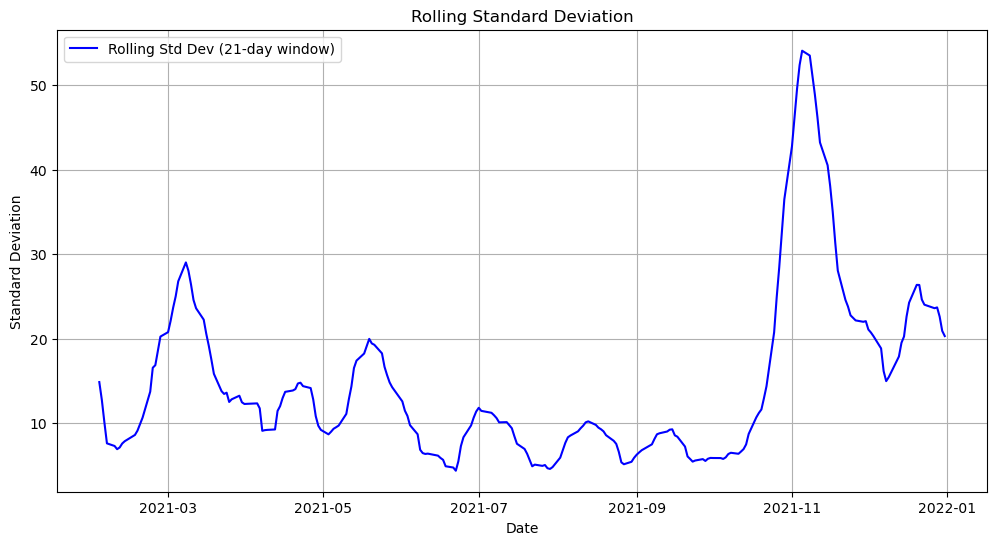

In [107]:
# Calculate rolling standard deviation
custom_symbols = ["AAPL", "GOOGL", "MSFT", "AMZN", "TSLA"]
# Define the start and end dates for your data
start_date = "2021-01-01"
end_date = "2022-01-01"

# Fetch the data for the specified stock and date range
data = yf.download(symbol, start=start_date, end=end_date)

# Calculate the rolling standard deviation with a 21-day window
rolling_std = data['Close'].rolling(window=21).std()

# Plot the rolling standard deviation
plt.figure(figsize=(12, 6))
plt.plot(data.index, rolling_std, label='Rolling Std Dev (21-day window)', color='blue')
plt.title("Rolling Standard Deviation")
plt.xlabel("Date")
plt.ylabel("Standard Deviation")
plt.legend(loc='upper left')
plt.grid(True)
plt.show()







# Plot rolling standard deviation


### Calculate and plot the correlation

In [113]:
# Calculate and plot the correlation
correlation_matrix = portfolios_df.corr()

# Display the correlation matrix
print(correlation_matrix)

                             SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
SOROS FUND MANAGEMENT LLC                     1.000000            0.699914   
PAULSON & CO.INC.                             0.699914            1.000000   
TIGER GLOBAL MANAGEMENT LLC                   0.561243            0.434479   
BERKSHIRE HATHAWAY INC                        0.754360            0.545623   
Algo 1                                        0.321211            0.268840   
Algo 2                                        0.826873            0.678152   
Daily_Return                                  0.837864            0.669732   

                             TIGER GLOBAL MANAGEMENT LLC  \
SOROS FUND MANAGEMENT LLC                       0.561243   
PAULSON & CO.INC.                               0.434479   
TIGER GLOBAL MANAGEMENT LLC                     1.000000   
BERKSHIRE HATHAWAY INC                          0.424423   
Algo 1                                          0.164387   
Algo 2         

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [114]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

# Define the stock symbols or tickers you want to fetch
custom_symbols = ["AAPL", "GOOGL", "MSFT", "AMZN", "TSLA"]

benchmark_symbol = "^GSPC"  # S&P 500 index symbol

# Define the start and end dates for your data
start_date = "2021-01-01"
end_date = "2022-01-01"

# Fetch historical data for the stock and the S&P 500
custom_symbols_data = yf.download(custom_symbols, start=start_date, end=end_date)['Adj Close']
benchmark_data = yf.download(benchmark_symbol, start=start_date, end=end_date)['Adj Close']

# Calculate daily returns for the stock and the S&P 500
custom_portfolio_df = custom_symbols_data.pct_change().dropna()
benchmark_returns = benchmark_data.pct_change().dropna()

# Calculate the covariance between stock and S&P 500 returns
covariance = custom_portfolio_df.cov(benchmark_returns, min_periods=1)
covariance = custom_portfolio_df.cov(benchmark_returns)

# Calculate the variance of S&P 500 returns
benchmark_variance = benchmark_returns.var()

# Calculate beta as the ratio of covariance to benchmark variance
beta = covariance / benchmark_variance

# Plot the beta trend
plt.figure(figsize=(12, 6))
plt.plot(beta.index, beta.values, label=f'Beta of {custom_symbols}', color='blue')
plt.title(f'Beta of {custom_symbols} vs. S&P 500')
plt.xlabel("Date")
plt.ylabel("Beta")
plt.legend(loc='upper left')
plt.grid(True)
plt.show()







[*********************100%%**********************]  5 of 5 completed
[*********************100%%**********************]  1 of 1 completed


TypeError: DataFrame.cov() got multiple values for argument 'min_periods'

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [116]:
# Calculate Annualized Sharpe Ratios
daily_returns = custom_portfolio_df['Adj Close']

# Calculate the risk-free rate (e.g., 10-year Treasury yield) as a decimal
risk_free_rate = 0.01  # Replace with the actual risk-free rate

# Calculate the average daily return
avg_daily_return = daily_returns.mean()

# Calculate the daily standard deviation of returns
std_dev_daily_return = daily_returns.std()

# Calculate the annualized Sharpe ratio using 252 trading days as a typical number
trading_days_per_year = 252
sharpe_ratio = (avg_daily_return - risk_free_rate) / (std_dev_daily_return * (trading_days_per_year ** 0.5))

# Print the annualized Sharpe ratio
print("Annualized Sharpe Ratio:", sharpe_ratio)


KeyError: 'Adj Close'

In [119]:
import matplotlib.pyplot as plt

# Visualize the sharpe ratios as a bar plot
# Calculate daily returns of the portfolio
daily_returns = custom_portfolio_df['Close']

# Calculate the risk-free rate (e.g., 10-year Treasury yield) as a decimal
risk_free_rate = 0.01  # Replace with the actual risk-free rate

# Calculate the average daily return
avg_daily_return = daily_returns.mean()

# Calculate the daily standard deviation of returns
std_dev_daily_return = daily_returns.std()

# Calculate the annualized Sharpe ratio using 252 trading days as a typical number
trading_days_per_year = 252
sharpe_ratio = (avg_daily_return - risk_free_rate) / (std_dev_daily_return * (trading_days_per_year ** 0.5))


# Print the annualized Sharpe ratio
print("Annualized Sharpe Ratio:", sharpe_ratio)



KeyError: 'Close'

### How does your portfolio do?

Write your answer here!

In [ ]:
It does well